## Basic Machine Learning Demo: Yahoo Finance and Hockey 
### Contents 
* Stock Market Prediction
* Stanley Cup Winner Prediction

*Complete project description can be found in README.md*

### Stock Market Prediction
In the first section of my demo, we will make a predictive model of the future of a stock ticker. For the sake of example I chose GOOG, but any alternative stock ticker can be used as well. We will use the python libraries yfinance, pandas, scikit-learn, and matplotlib to predict and visualize the data.

The first block instantiates data using stock information from the yahoo finance database.

In [78]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download historical stock data (within the year 2022)
ticker = 'GOOG'
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data.head()

C:\Users\ben\AppData\Local\Temp\ipykernel_31876\2394650224.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2022-01-03  144.217239  144.689939  142.654537  143.621780  25214000
2022-01-04  143.563156  145.743692  142.966347  144.690458  22928000
2022-01-05  136.840103  143.445341  136.710866  143.329028  49642000
2022-01-06  136.738205  138.860599  135.955367  136.685024  29050000
2022-01-07  136.194931  137.437787  134.986614  137.090107  19408000

The next cell cleans and splits the data using python slicing methods and the scikit-learn train_test_split() method. The split values are then printed to check for accurracy. 

In [ ]:
# Clean the data
features = data[['Close']].shift(1).dropna()
labels = data['Close'][1:]

# Break data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features.values.reshape(-1, 1), labels.values, test_size=0.2, random_state=42)

# Ensure the data is split correctly
print(f"Training set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")

Training set size: 200
Testing set size: 50


The next step is to set up and train a linear regression model based on the train / test splits. We also use the scikit mse method to evaluate the effectiveness of the model.

In [80]:
# Set up and train Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate error
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 5.97


Finally, we plot the tested vs actual results on a matplotlib plot to visualize the error.

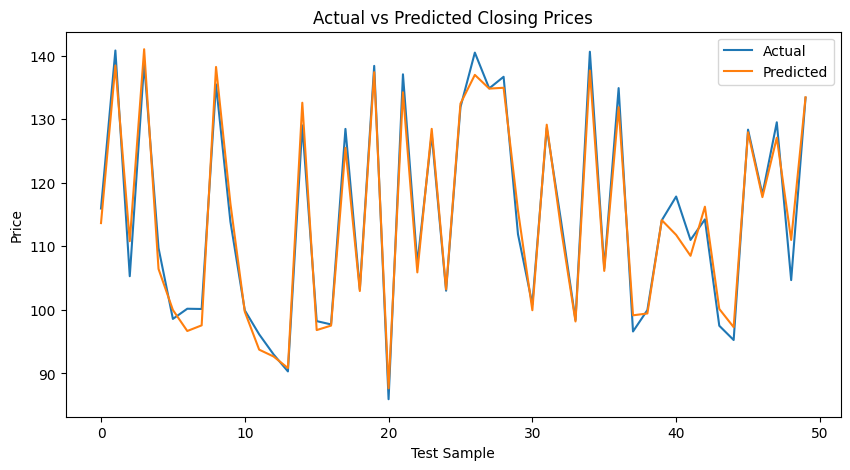

In [81]:
# Plot the results
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Test Sample')
plt.ylabel('Price')
plt.legend()
plt.show()